# HW1
```
author zeyuan pan
date 09.05
```

## question 1 eulerian
(a)

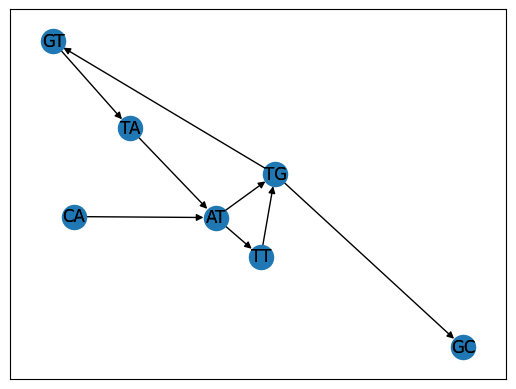

In [1]:
## question 1 eulerian.a
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

sequence = ['CAT', 'ATT', 'ATG', 'TAT', 'TTG', 'TGC', 'TGT', 'GTA']
 
def construct_graph_from(sub):
    G = nx.DiGraph()
    s=[]
    for i in sub:
        s.append(i[0:2])
        s.append(i[1:3])
    G.add_nodes_from(s)

    for (i,j) in  combinations(G.nodes(),2):
        if i[1]==j[0]:
            concat=i[0]+j
            if concat in sub:
                G.add_edge(i,j)
        if j[1]==i[0]:
            concat=j[0]+i
            if concat in sub:
                G.add_edge(j,i)

    
    return G

G = construct_graph_from(sequence) 
pos=nx.spring_layout(G) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [2]:
for i in G.nodes():
    if G.in_degree(i)<G.out_degree(i):
        start=i
    elif G.out_degree(i)<G.in_degree(i):
        stop= i

G.add_edge(stop,start)


if(nx.is_eulerian(G)):
    print("This graph contains eulerian_circuit")
    cycle=list(nx.eulerian_circuit(G))
    print(cycle)

This graph contains eulerian_circuit
[('CA', 'AT'), ('AT', 'TT'), ('TT', 'TG'), ('TG', 'GT'), ('GT', 'TA'), ('TA', 'AT'), ('AT', 'TG'), ('TG', 'GC'), ('GC', 'CA')]


(b)

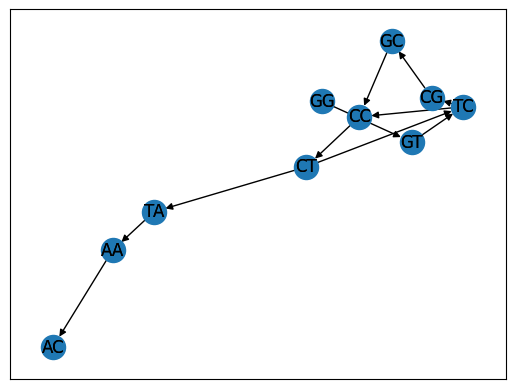

In [31]:
sequence2=['GGT', 'GTC', 'TCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC']

G2 = construct_graph_from(sequence2) 
pos2=nx.spring_layout(G2) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G2,pos2)
nx.draw_networkx_labels(G2,pos2)
plt.show()
# print(list(G2.nodes())[0])

This graph contains eulerian_circuit
[('GG', 'GT'), ('GT', 'TC'), ('TC', 'CG'), ('CG', 'GC'), ('GC', 'CC'), ('CC', 'CT'), ('CT', 'TA'), ('TA', 'AA'), ('AA', 'AC'), ('AC', 'CT'), ('CT', 'TC'), ('TC', 'CC'), ('CC', 'GG'), ('GG', 'GG')]


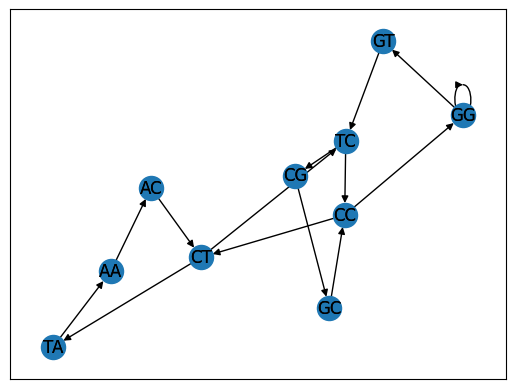

In [34]:

def make_eulerian(Graph):
    start_p=list(Graph.nodes())[0]
    end_p=list(Graph.nodes())[0]
    if(nx.is_eulerian(Graph)):
        print("This graph contains eulerian_circuit")
        cycle=list(nx.eulerian_circuit(Graph))
        print(cycle)
    else:
        G=Graph
        for i in list(G.nodes()):
            if G.in_degree(i)<G.out_degree(i):
                start_p=i
            elif G.out_degree(i)<G.in_degree(i):
                end_p=i
            G.add_edge(end_p,start_p)
        make_eulerian(G)

make_eulerian(G2)
pos2=nx.spring_layout(G2) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G2,pos2)
nx.draw_networkx_labels(G2,pos2)
plt.show()
